# Supervised Machine Learning Pipeline - Multi-class Classification

I will be using the UCI Machine Learning Wine Data set to:
1. Perform multi-class classification of wine types (3 classes) using 13 chemical features.
2. Demonstrate examples of using a machine learning pipeline.

Linear classifiers
- k nearest neighbors
- logistic regression
- SVM - linearSVC
- SVM - SVC which uses nonlinear SVM by default

# Modify loading data

In [ ]:
# once I have X and y, modify below
X = df.drop('target', axis=1)
y = df[['target']]

# stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Import packages

In [194]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import sklearn.datasets

# Exploratory data analysis (EDA) using sklearn wine dataset

In [ ]:
wine = sklearn.datasets.load_wine()

In [3]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [9]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
# check dimensions
print('wine.data dimensions: ', wine.data.shape)
print('wine.target dimensions: ', wine.target.shape)

wine.data dimensions:  (178, 13)
wine.target dimensions:  (178,)


In [87]:
# set feature matrix and target
X = wine.data
y = wine.target

# split data into training and testing sets with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

In [88]:
# check dimensions
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(142, 13) (142,) (36, 13) (36,)


# 1. k nearest neighbors (knn)

In [188]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model with default hyperparameters
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [189]:
knn.score(X_test, y_test)

0.8055555555555556

In [42]:
# Predict on the test features, print the results
pred = knn.predict(X_test)[0]
# Prediction for test example 0: 1.0
print("Prediction for test example 0:", pred)

Prediction for test example 0: 0


In [181]:
# test k=6 with parameter n_neighbors
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.75

In [180]:
# hyperparameter tuning for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()
# args: model, grid, number of folds for cross validation
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))

print("knn training accuracy:", knn_cv.score(X_train, y_train))
print("knn test accuracy    :", knn_cv.score(X_test, y_test))

Tuned KNN Parameters: {'n_neighbors': 24}
Best score is 0.7253521126760564
knn training accuracy: 0.7183098591549296
knn test accuracy    : 0.75


### check cv.best_score_ vs train/test accuracy

# 2. Logistic Regression - multi-class
Key hyperparameters:
- C (inverse regularization strength)
- penalty (type of regularization - L1 and L2)
- multi_class (type of multi-class)

## 2.1 One-vs-Rest

In [53]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
# lr.predict(X_test)
# lr.score(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
lr.score(X_test, y_test)

0.9722222222222222

In [191]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

OVR training accuracy: 0.9788732394366197
OVR test accuracy    : 0.9722222222222222


In [192]:
y_pred_lr_ovr = lr_ovr.predict(X_test)
print(classification_report(y_test, y_pred_lr_ovr))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_lr_ovr))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       0.93      1.00      0.97        14
          2       1.00      0.90      0.95        10

avg / total       0.97      0.97      0.97        36

Confusion matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]


In [46]:
# confidence intervals
lr.predict_proba(X_test[:1])
# array([[ 9.951e-01, 4.357e-03, 5.339e-04]])

array([[9.98849252e-01, 3.31465476e-05, 1.11760144e-03]])

## 2.2 Softmax/Multinomial/Cross-Entropy Loss

In [197]:
lr_mn = LogisticRegression(multi_class="multinomial",solver="lbfgs")
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

Softmax training accuracy: 0.9788732394366197
Softmax test accuracy    : 0.9722222222222222


In [198]:
y_pred_lr_mn = lr_mn.predict(X_test)
print(classification_report(y_test, y_pred_lr_mn))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_lr_mn))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       0.93      1.00      0.97        14
          2       1.00      0.90      0.95        10

avg / total       0.97      0.97      0.97        36

Confusion matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]


## Optional: L1 regularization

In [199]:
# Specify L1 regularization
lr = LogisticRegression()#penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10, 100]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

# with l1 reg - C=1
# without l1 reg - C=10

Best CV params {'C': 100}
Total number of features: 39
Number of selected features: 39


## 2.4 Visualizing boundaries - test
- impose a Voronoi tesselation on your 2D plot, i.e. color it based on proximity to the 2D data points
- https://stackoverflow.com/questions/37718347/plotting-decision-boundary-for-high-dimension-data

(142, 2)


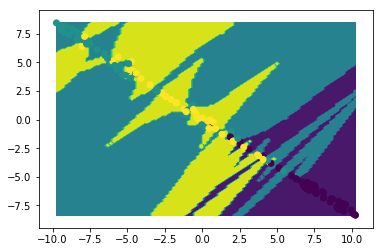

In [101]:
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.manifold.t_sne import TSNE

# train model
X_Train_embedded = TSNE(n_components=2).fit_transform(X_train)
print(X_Train_embedded.shape)
model = LogisticRegression().fit(X_train,y_train)
y_predicted = model.predict(X_train)

# create meshgrid
resolution = 100 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded, y_predicted) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
plt.contourf(xx, yy, voronoiBackground)
plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=y_train)
plt.show()

# 3. LinearSVC for SVM

In [38]:
# LinearSVC
import sklearn.datasets
wine = sklearn.datasets.load_wine()
from sklearn.svm import LinearSVC

# svm.ft(wine.data, wine.target)
# svm.score(wine.data, wine.target)

In [141]:
linearsvm = LinearSVC()
linearsvm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [89]:
print("LinearSVC training accuracy:", linearsvm.score(X_train, y_train))
print("LinearSVC test accuracy    :", linearsvm.score(X_test, y_test))

LinearSVC training accuracy: 0.9366197183098591
LinearSVC test accuracy    : 0.9722222222222222


In [144]:
LinearSVC().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])

In [152]:
# CV and scaling in a pipeline using Normalization
steps = [('scaler', StandardScaler()),
         ('svc', LinearSVC())]
pipeline = Pipeline(steps)

# Specify hyperparameter space using a dictionary
parameters = {'svc__C':[0.1, 1, 10]}

X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train_svc, y_train_svc)
y_pred_svc = cv.predict(X_test_svc)

# Compute and print metrics
# print best parameters
print("Tuned Model Parameters: {}".format(cv.best_params_))
print("LinearSVC training accuracy:", linearsvm.score(X_train, y_train))
print("Test Accuracy: {}".format(cv.score(X_test_svc, y_test_svc)))
print(classification_report(y_test_svc, y_pred_svc))
print("Confusion matrix:\n", confusion_matrix(y_test_svc, y_pred_svc))

Tuned Model Parameters: {'svc__C': 0.1}
LinearSVC training accuracy: 0.9154929577464789
Test Accuracy: 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       1.00      1.00      1.00        14
          2       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        36

Confusion matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


# 4. SVC - default nonlinear SVM

In [91]:
# SVC
import sklearn.datasets
wine = sklearn.datasets.load_wine()
from sklearn.svm import SVC
svm = SVC()
# svm.fit(wine.data, wine.target)
# svm.score(wine.data, wine.target)

In [92]:
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [93]:
print("SVC training accuracy:", svm.score(X_train, y_train))
print("SVC test accuracy    :", svm.score(X_test, y_test))

# overfit model

SVC training accuracy: 1.0
SVC test accuracy    : 0.3888888888888889


## 4.1 SVC: Tune hyperparameters to improve test accuracy

In [122]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train,y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Train accuracy of best grid search hypers:", 
      searcher.score(X_train,y_train))
# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", 
      searcher.score(X_test, y_test))

Best CV params {'C': 10, 'gamma': 0.001}
Best CV accuracy 0.7253521126760564
Train accuracy of best grid search hypers: 0.9788732394366197
Test accuracy of best grid search hypers: 0.7777777777777778


## 4.2 SVC: normalize data, tune hyperparameters and check final result

In [153]:
# CV and scaling in a pipeline
steps = [('scaler', StandardScaler()),
         ('svm', SVC())]
pipeline = Pipeline(steps)

# Specify hyperparameter space using a dictionary
parameters = {'svm__C':[0.1, 1, 10],
              'svm__gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train_svm, y_train_svm)
y_pred_svm = cv.predict(X_test_svm)

# Compute and print metrics
# print best parameters
print("Tuned Model Parameters: {}".format(cv.best_params_))
print("Test Accuracy: {}".format(cv.score(X_test_svm, y_test_svm)))
print(classification_report(y_test_svm, y_pred_svm))
print("Confusion matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))

Tuned Model Parameters: {'svm__C': 1, 'svm__gamma': 0.1}
Test Accuracy: 0.9722222222222222
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       0.93      1.00      0.97        14
          2       1.00      0.90      0.95        10

avg / total       0.97      0.97      0.97        36

Confusion matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]


# Visualizing decision boundaries

In [ ]:
# Visualize the decision boundaries of various classifier types. 
# A subset of scikit-learn's built-in wine dataset is already 
# loaded into X along with binary labels in y.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(),
LinearSVC(),
SVC(),
KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X_train, y_train)

# plot function
#############
# Work on code below


    
# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# 5. SGDClassifier (SGD=stochastic gradient descent)
- scales better to larger data sets
- specify loss
- hyperparameter 'alpha' is like '1/C'
    - bigger alpha > more regularization

In [ ]:
# Review: SGDClassfier for logreg vs SVM
from skelearn.linear_model import SGDClassifier
logreg = SGDClassifier(loss='log')
linsvm = SGDClassifier(loss='hinge')

In [125]:
from sklearn.linear_model import SGDClassifier

# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
# Search over the regularization strength, the hinge vs. log losses,
# and L1 vs. L2 regularization.
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge','log'], 'penalty':['l1','l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding train and test scores
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Train accuracy of best grid search hypers:", 
      searcher.score(X_train,y_train))
print("Test accuracy of best grid search hypers:", 
      searcher.score(X_test, y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

Best CV params {'alpha': 1, 'loss': 'log', 'penalty': 'l1'}
Best CV accuracy 0.6549295774647887
Train accuracy of best grid search hypers: 0.6197183098591549
Test accuracy of best grid search hypers: 0.5555555555555556


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

# 6. Cross-validation


# 8. LogReg and ROC Curve

In [ ]:
# example: plot ROC curve
from sklearn.metrics import roc_curve
# y_pred_prob = predicted probabilities
# .predict_proba returns an array with 2 columns, each column
# contains probabilities for the respective target values,
# we choose the 2nd column, which is index 1, the probabilities
# being 1
y_pred_prob = logreg.predict_proba(X_test)[:,1]
# fpr = false positive rate, tpr = true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

# 9. Area under the ROC curve (AUC)

In [ ]:
# example: Compute AUC
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size = 0.4, random_state=42)

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Compute predicted probabilities to compute AUC
y_pred = logreg.predict_proba(X_test)[:,1]
# Pass true labels and predicted probabilities to ROC AUC score
roc_auc_score(y_test, y_pred_prob)
# out: 0.997466216

In [ ]:
# Compute AUC using cross-validation
from sklearn.model_selection import cross_val_score

# pass the estimator, features, and target
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

print(cv_scores)
# out: [ 0.9967   0.99183 .  0.99583 .  1.   0.961406]